In [32]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

In [6]:
from sklearn.linear_model import LinearRegression

In [8]:
import ISLP
from ISLP import load_data

In [9]:
college=load_data('College')

In [10]:
college.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [11]:
college.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Private      777 non-null    category
 1   Apps         777 non-null    int64   
 2   Accept       777 non-null    int64   
 3   Enroll       777 non-null    int64   
 4   Top10perc    777 non-null    int64   
 5   Top25perc    777 non-null    int64   
 6   F.Undergrad  777 non-null    int64   
 7   P.Undergrad  777 non-null    int64   
 8   Outstate     777 non-null    int64   
 9   Room.Board   777 non-null    int64   
 10  Books        777 non-null    int64   
 11  Personal     777 non-null    int64   
 12  PhD          777 non-null    int64   
 13  Terminal     777 non-null    int64   
 14  S.F.Ratio    777 non-null    float64 
 15  perc.alumni  777 non-null    int64   
 16  Expend       777 non-null    int64   
 17  Grad.Rate    777 non-null    int64   
dtypes: category(1), float64(1), in

In [12]:
x=college[['Apps', 'Accept', 'Enroll','F.Undergrad', 'P.Undergrad', 'Outstate', 'Room.Board', 'Books',
    'Personal', 'PhD', 'Terminal', 'S.F.Ratio', 'perc.alumni', 'Expend',
       'Grad.Rate']]

In [13]:
y=college['Top10perc']

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
lm=LinearRegression()

In [36]:
results=lm.fit(x_train,y_train)

In [37]:
y_pred=results.predict(x_test)

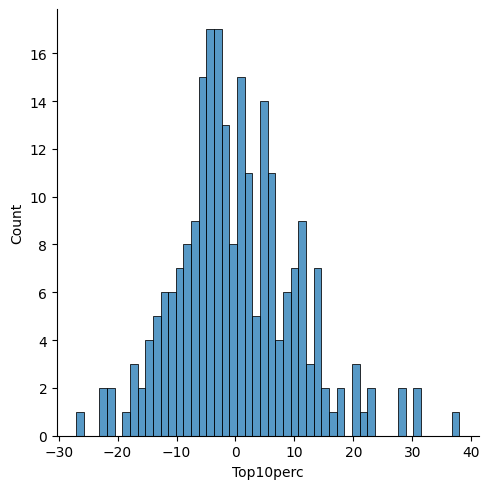

In [38]:
sns.displot((y_test-y_pred),bins=50)

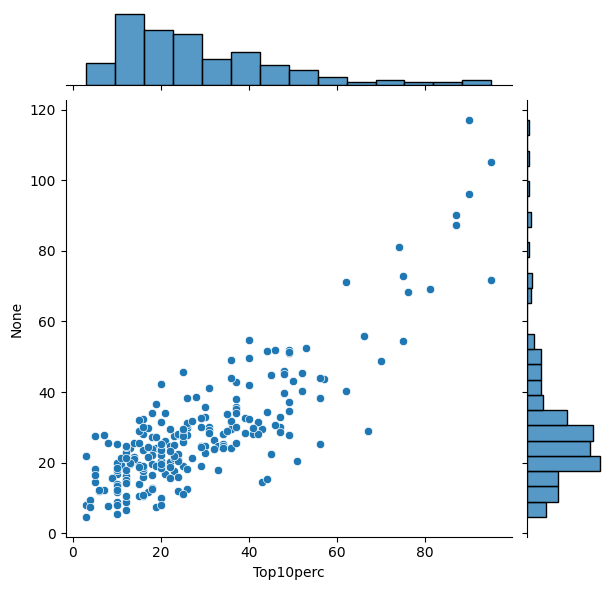

In [39]:
sns.jointplot(x=y_test,y=y_pred,kind='scatter')

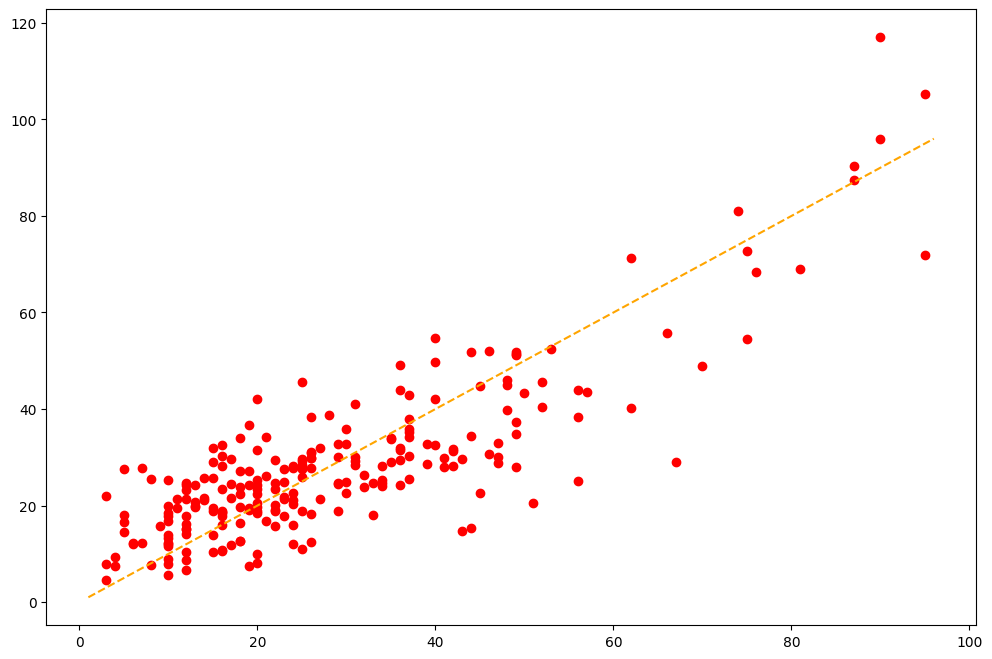

In [40]:
plt.figure(figsize=(12,8))
plt.scatter(x=y_test,y=y_pred,color='r')
plt.plot([y_train.min(),y_train.max()],[y_train.min(),y_train.max()],color='orange',linestyle='--')

In [41]:
y_pred[:5]

array([24.26929549, 16.46218162, 29.86605788, 27.56953116, 19.48783324])

In [42]:
from sklearn import metrics

In [43]:
print('The MAE:',metrics.mean_absolute_error(y_test,y_pred))

The MAE: 7.937755907917242


In [34]:
coeff=pd.DataFrame(results.coef_,x.columns,columns=['Coefficinets'])
coeff

,Coefficinets
Apps,0.003509
Accept,-0.006880
Enroll,0.005920
F.Undergrad,0.000417
P.Undergrad,-0.001374
Outstate,0.000836
Room.Board,-0.001254
Books,0.006482
Personal,0.000037
PhD,0.267940


In [44]:
print('The RMSE:',metrics.root_mean_squared_error(y_test,y_pred))

The RMSE: 10.260771736274304
